train/PMC5070146_table_0.xml


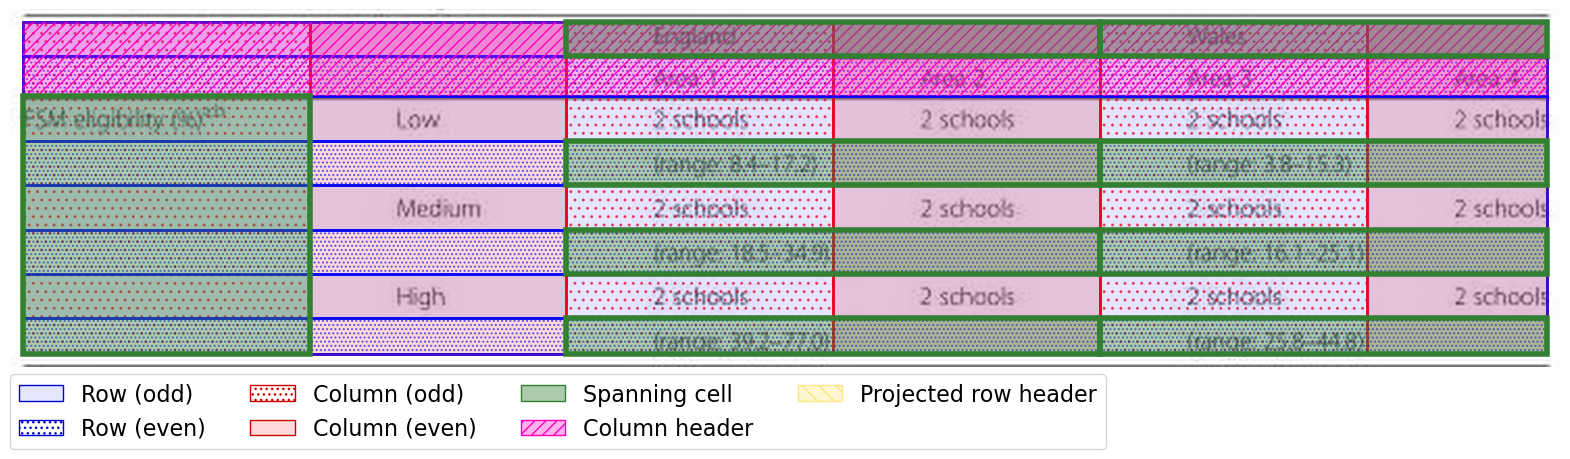

In [4]:
"""
Copyright (C) 2023 Microsoft Corporation

Assumes the data is in PASCAL VOC data format and the folder structure is:
[data_directory]/
- images/
- train/
- test/
- val/
"""

import argparse
import os
import json
from collections import defaultdict
import traceback

from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch
import xml.etree.ElementTree as ET

def read_pascal_voc(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    bboxes = []
    labels = []

    for object_ in root.iter('object'):

        ymin, xmin, ymax, xmax = None, None, None, None
        
        label = object_.find("name").text

        for box in object_.findall("bndbox"):
            ymin = float(box.find("ymin").text)
            xmin = float(box.find("xmin").text)
            ymax = float(box.find("ymax").text)
            xmax = float(box.find("xmax").text)

        bbox = [xmin, ymin, xmax, ymax] # PASCAL VOC
        
        bboxes.append(bbox)
        labels.append(label)

    return bboxes, labels

color_map = defaultdict(lambda: ('magenta', 0, 1))
color_map.update({'table': ('brown', 0.1, 3), 'table row': ('blue', 0.04, 1),
                  'table column': ('red', 0.04, 1), 'table projected row header': ('cyan', 0.2, 3),
                  'table column header': ('magenta', 0.2, 3), 'table spanning cell': ('green', 0.6, 3)})

def plot_bbox(ax, bbox, color='magenta', linewidth=1, alpha=0):
    rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                             edgecolor='none',facecolor=color, alpha=alpha)
    ax.add_patch(rect)
    rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                             edgecolor=color,facecolor='none',linestyle="--")
    ax.add_patch(rect) 


def get_args():
    parser = argparse.ArgumentParser()

    parser.add_argument('--pascal_data_dir',
                        help="Root directory for source data to process")
    parser.add_argument('--words_data_dir',
                        help="Root directory for source data to process")
    parser.add_argument('--split', default='',
                        help="Split to process")
    parser.add_argument('--output_dir',
                        help="Root directory for output data")
    parser.add_argument('--num_samples', type=int)
    return parser.parse_args()

def showXml(data_directory,split = "/",num_samples = 1):

    # xml_filenames = [elem for elem in os.listdir(os.path.join(data_directory, split)) if elem.endswith(".xml")]
    # lấy danh sách xml bằng cách đọc từ file train_filelist.txt
    xml_filenames =  open(os.path.join(data_directory, "train_filelist.txt"),'r').read().splitlines()
    for idx, filename in enumerate(xml_filenames):
        if not num_samples is None and idx == num_samples:
            break
        print(filename)
        try:
            xml_filepath = os.path.join(data_directory, filename)
            img_filepath = xml_filepath.replace(split, "images/").replace(".xml", ".jpg")
            
            bboxes, labels = read_pascal_voc(xml_filepath)
            img = Image.open(img_filepath)

            # TODO: Add option to include words
            #words_filepath = os.path.join(words_directory, filename.replace(".xml", "_words.json"))
            #try:
            #    with open(words_filepath, 'r') as json_file:
            #        words = json.load(json_file)
            #except:
            #    words = []
            
            ax = plt.gca()
            ax.imshow(img, interpolation="lanczos")
            plt.gcf().set_size_inches((24, 24))

            tables = [bbox for bbox, label in zip(bboxes, labels) if label == 'table']
            columns = [bbox for bbox, label in zip(bboxes, labels) if label == 'table column']
            rows = [bbox for bbox, label in zip(bboxes, labels) if label == 'table row']
            column_headers = [bbox for bbox, label in zip(bboxes, labels) if label == 'table column header']
            projected_row_headers = [bbox for bbox, label in zip(bboxes, labels) if label == 'table projected row header']
            spanning_cells = [bbox for bbox, label in zip(bboxes, labels) if label == 'table spanning cell']

            for column_num, bbox in enumerate(columns):
                if column_num % 2 == 0:
                    linewidth = 2
                    alpha = 0.6
                    facecolor = 'none'
                    edgecolor = 'red'
                    hatch = '..'
                else:
                    linewidth = 2
                    alpha = 0.15
                    facecolor = (1, 0, 0)
                    edgecolor = (0.8, 0, 0)
                    hatch = ''
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=0, 
                                         edgecolor=edgecolor, facecolor=facecolor, linestyle="-",
                                         hatch=hatch, alpha=alpha)
                ax.add_patch(rect)
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                                             edgecolor='red', facecolor='none', linestyle="-",
                                             alpha=0.8)
                ax.add_patch(rect)

            for row_num, bbox in enumerate(rows):
                if row_num % 2 == 1:
                    linewidth = 2
                    alpha = 0.6
                    edgecolor = 'blue'
                    facecolor = 'none'
                    hatch = '....'
                else:
                    linewidth = 2
                    alpha = 0.1
                    facecolor = (0, 0, 1)
                    edgecolor = (0, 0, 0.8)
                    hatch = ''
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=0, 
                                         edgecolor=edgecolor, facecolor=facecolor, linestyle="-",
                                         hatch=hatch, alpha=alpha)
                ax.add_patch(rect)
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                                             edgecolor='blue', facecolor='none', linestyle="-",
                                             alpha=0.8)
                ax.add_patch(rect)
            
            for bbox in column_headers:
                linewidth = 3
                alpha = 0.3
                facecolor = (1, 0, 0.75) #(0.5, 0.45, 0.25)
                edgecolor = (1, 0, 0.75) #(1, 0.9, 0.5)
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                                         edgecolor='none',facecolor=facecolor, alpha=alpha)
                ax.add_patch(rect)
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=0, 
                                         edgecolor=edgecolor,facecolor='none',linestyle="-", hatch='///')
                ax.add_patch(rect)

            for bbox in projected_row_headers:
                facecolor = (1, 0.9, 0.5) #(0, 0.75, 1) #(0, 0.4, 0.4)
                edgecolor = (1, 0.9, 0.5) #(0, 0.7, 0.95)
                alpha = 0.35
                linewidth = 3
                linestyle="--"
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                                         edgecolor='none',facecolor=facecolor, alpha=alpha)
                ax.add_patch(rect)
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=1,
                                         edgecolor=edgecolor,facecolor='none',linestyle=linestyle)
                ax.add_patch(rect)
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=0,
                                         edgecolor=edgecolor,facecolor='none',linestyle=linestyle, hatch='\\\\')
                ax.add_patch(rect)

            for bbox in spanning_cells:
                color = (0.2, 0.5, 0.2) #(0, 0.4, 0.4)
                alpha = 0.4
                linewidth = 4
                linestyle="-"
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                                         edgecolor='none',facecolor=color, alpha=alpha)
                ax.add_patch(rect)
                rect = patches.Rectangle(bbox[:2], bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=linewidth, 
                                         edgecolor=color,facecolor='none',linestyle=linestyle) # hatch='//'
                ax.add_patch(rect)

            table_bbox = tables[0]
            plt.xlim([table_bbox[0]-5, table_bbox[2]+5])
            plt.ylim([table_bbox[3]+5, table_bbox[1]-5])
            plt.xticks([], [])
            plt.yticks([], [])

            legend_elements = [Patch(facecolor=(0.9, 0.9, 1), edgecolor=(0, 0, 0.8),
                                     label='Row (odd)'),
                               Patch(facecolor=(1, 1, 1), edgecolor=(0, 0, 0.8),
                                     label='Row (even)', hatch='...'),
                               Patch(facecolor=(1, 1, 1), edgecolor=(0.8, 0, 0),
                                     label='Column (odd)', hatch='...'),
                               Patch(facecolor=(1, 0.85, 0.85), edgecolor=(0.8, 0, 0),
                                     label='Column (even)'),
                               Patch(facecolor=(0.68, 0.8, 0.68), edgecolor=(0.2, 0.5, 0.2),
                                     label='Spanning cell'),
                               Patch(facecolor=(1, 0.7, 0.925), edgecolor=(1, 0, 0.75),
                                     label='Column header', hatch='///'),
                               Patch(facecolor=(1, 0.965, 0.825), edgecolor=(1, 0.9, 0.5),
                                     label='Projected row header', hatch='\\\\')]
            ax.legend(handles=legend_elements, bbox_to_anchor=(0, -0.02), loc='upper left', borderaxespad=0,
                         fontsize=16, ncol=4)  
            plt.gcf().set_size_inches(20, 20)
            plt.axis('off')
            # save_filepath = os.path.join(output_directory, filename.replace(".xml", "_ANNOTATIONS.jpg"))
            # plt.savefig(save_filepath, bbox_inches='tight', dpi=150)
            plt.show()
            # plt.close()
        except:
            traceback.print_exc()
            continue

showXml("F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Structure/","train/",1)

In [7]:
# Đếm số lượng file trong các thư mục con của thư mục F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection/

import os
path = "F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Structure/"
for root, dirs, files in os.walk(path):
    print(root)
    print(len(files))


F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Structure/
4
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Structure/images
947642
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Structure/test
93834
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Structure/train
758849
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Structure/val
94959


: 

In [4]:
# Đếm số lượng file trong các thư mục con của thư mục F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection/

import os
path = "F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection"
for root, dirs, files in os.walk(path):
    print(root)
    print(len(files))


F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection
4
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection\images
467021
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection\test
57125
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection\train
460589
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection\val
57591
F:/Python/Table Recognition/pubtables-1m/PubTables-1M-Detection\words
0
